In [165]:
import numpy as np
import pandas as pd
import decimal as D
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from numpy import set_printoptions
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [134]:
# Load dataset
filename = 'datamart-export.csv'
dataset = read_csv(filename,  delim_whitespace=False)

In [108]:
# Data Pre-processing

dataset = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]
columns = ['purchase_type', 'selling_basis', 'class','grade','head_count',
           'weight_range_low', 'weight_range_high','average_weight',
           'dressed_percentage', 'price_range_low','price_range_high', 'weighted_avg_price']

dataset.columns = columns
dataset.dropna(inplace=True)
print(dataset.shape)
print("Number of NaN values in the dataset is "+str(dataset.isnull().sum().sum()))
print("Number of NaN values in the dataset is "+str(dataset.isnull().sum().sum()))
print(dataset.dtypes)

(154388, 12)
Number of NaN values in the dataset is 0
Number of NaN values in the dataset is 0
purchase_type          object
selling_basis          object
class                  object
grade                  object
head_count            float64
weight_range_low      float64
weight_range_high     float64
average_weight        float64
dressed_percentage    float64
price_range_low       float64
price_range_high      float64
weighted_avg_price    float64
dtype: object


In [109]:
# Encoding categorical data
target = dataset.pop('weighted_avg_price')
columns_to_encode = ['purchase_type','selling_basis','class','grade']
dataset = pd.get_dummies(dataset, columns = columns_to_encode)
#dataset.insert(22, 'weighted_avg_price', target)
dataset_x = dataset
dataset_y = target
print(dataset.dtypes)

head_count                           float64
weight_range_low                     float64
weight_range_high                    float64
average_weight                       float64
dressed_percentage                   float64
price_range_low                      float64
price_range_high                     float64
purchase_type_FORMULA NET              uint8
purchase_type_NEGOTIATED GRID NET      uint8
selling_basis_Dressed                  uint8
selling_basis_Live                     uint8
class_All Steers & Heifers             uint8
class_Dairybred Steer/Heifer           uint8
class_Heifer                           uint8
class_Mixed Steer/Heifer               uint8
class_Mixed Steer/Heifer/Cow           uint8
class_Steer                            uint8
grade_ 0 - 35% Choice                  uint8
grade_35 - 65% Choice                  uint8
grade_65 - 80% Choice                  uint8
grade_Over 80% Choice                  uint8
grade_Total all grades                 uint8
dtype: obj

In [112]:
# descriptions
set_option('precision', 1)
print(dataset.describe())

       head_count  weight_range_low  weight_range_high  average_weight  \
count    154388.0          154388.0           154388.0        154388.0   
mean       1879.4             894.6             1042.2           973.4   
std        5426.6             245.7              243.8           236.1   
min           1.0             178.0              458.0           458.0   
25%         147.0             711.0              862.0           801.0   
50%         416.0             774.0              939.0           851.0   
75%        1226.0            1129.0             1270.0          1218.0   
max       85382.0            2748.0             2748.0          2748.0   

       dressed_percentage  price_range_low  price_range_high  \
count            154388.0         154388.0          154388.0   
mean                 62.6            157.1             167.8   
std                   1.7             41.8              45.7   
min                  30.0              4.8              68.2   
25%          

In [113]:
# correlation
set_option('precision', 2)
print(dataset.corr(method='pearson'))

                                   head_count  weight_range_low  \
head_count                               1.00         -1.99e-01   
weight_range_low                        -0.20          1.00e+00   
weight_range_high                        0.02          8.80e-01   
average_weight                          -0.08          9.60e-01   
dressed_percentage                       0.22         -5.42e-02   
price_range_low                          0.07         -6.22e-01   
price_range_high                         0.20         -6.77e-01   
purchase_type_FORMULA NET                0.21          1.62e-01   
purchase_type_NEGOTIATED GRID NET       -0.21         -1.62e-01   
selling_basis_Dressed                    0.12         -9.34e-01   
selling_basis_Live                      -0.12          9.34e-01   
class_All Steers & Heifers               0.52         -2.46e-02   
class_Dairybred Steer/Heifer            -0.12          5.91e-02   
class_Heifer                            -0.04         -1.65e-0

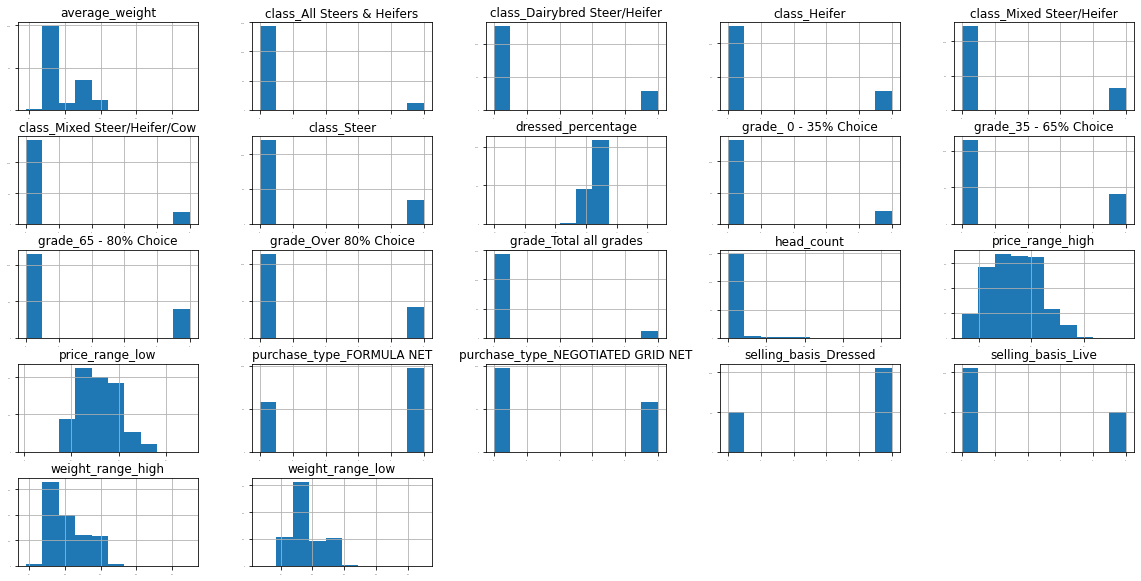

In [114]:
# histograms
pyplot.rc('figure', figsize=(20,10))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

<ipython-input-122-fe6bbad47a86>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.colums = columns


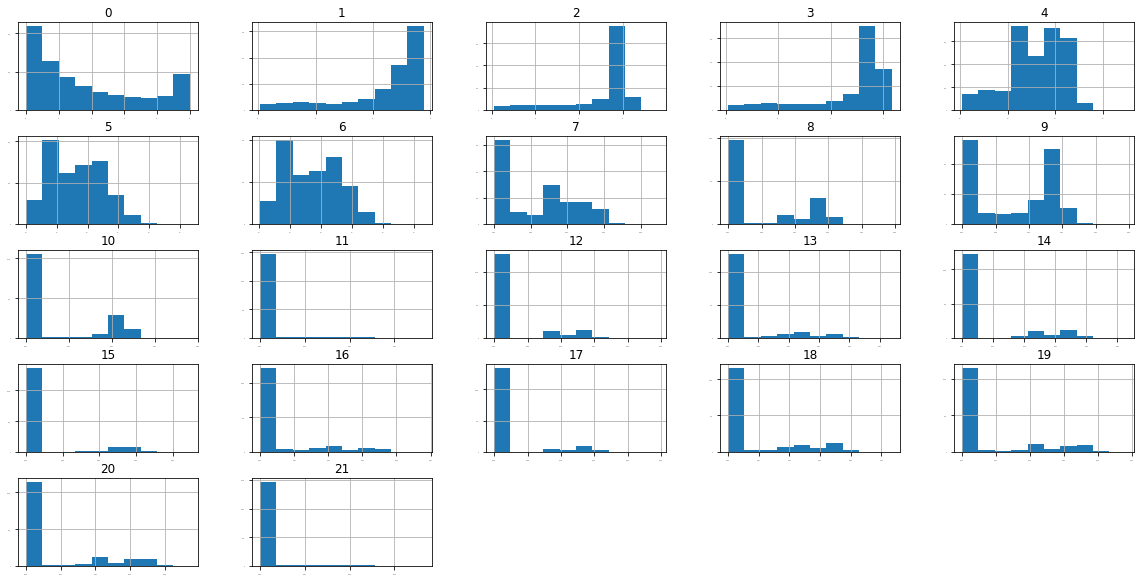

(154388, 22)


In [122]:
columns = dataset.columns
array = dataset.values
# separate array into input and output components

scaler = Normalizer().fit(array)
normalizedX = scaler.transform(array)
# summarize transformed data
set_printoptions(precision=3)
#print(normalizedX[0:5,:])
#normalizedX.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
#pyplot.show()
dataset = pd.DataFrame(data=normalizedX)
dataset.colums = columns
#print(pd.DataFrame(data=normalizedX))
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()
print(dataset.shape)

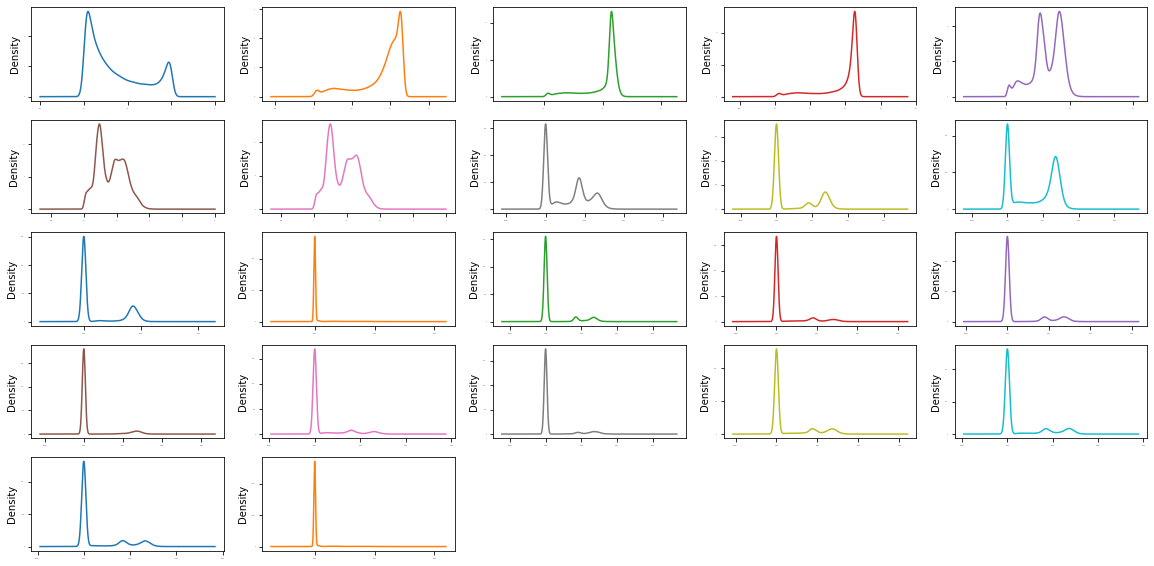

In [123]:
# density
dataset.plot(kind='density', subplots=True, layout=(5,5), sharex=False, legend=False,
fontsize=1)
pyplot.show()

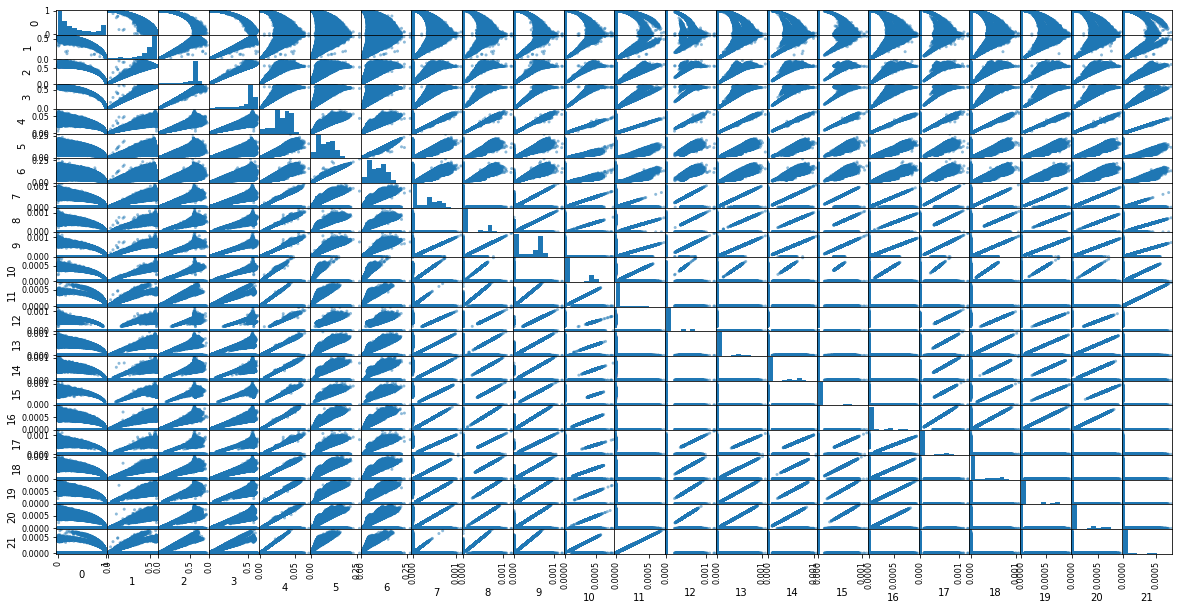

In [124]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

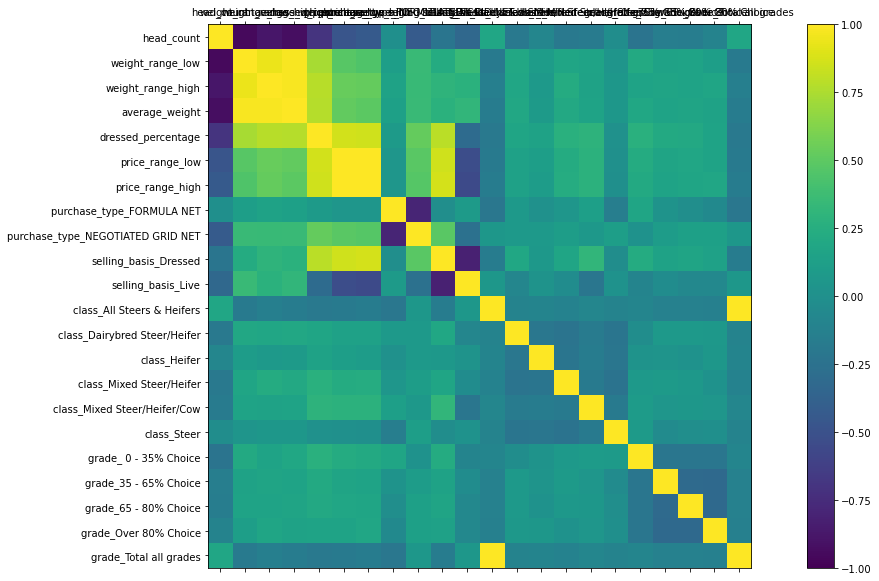

In [127]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,22,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

In [155]:
array = dataset.values
X = array
Y = target.values
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.942 0.038 0.015]
[[ 7.884e-01 -3.609e-01 -3.448e-01 -3.515e-01 -2.136e-02 -5.195e-02
  -5.019e-02 -3.677e-05 -3.134e-04 -1.943e-04 -1.559e-04  3.289e-05
  -1.112e-04 -4.501e-05 -1.211e-04 -8.930e-05 -1.646e-05 -1.185e-04
  -9.408e-05 -9.664e-05 -7.389e-05  3.289e-05]
 [-5.781e-01 -2.056e-01 -6.180e-01 -4.281e-01 -4.664e-02 -1.524e-01
  -1.815e-01 -1.025e-03  3.095e-04 -1.075e-03  3.592e-04 -3.542e-05
  -5.744e-05 -1.036e-04 -2.593e-04 -5.961e-05 -2.006e-04  2.203e-04
  -2.482e-04 -1.952e-04 -4.574e-04 -3.542e-05]
 [-1.127e-01 -2.118e-01 -9.830e-02 -1.405e-01  1.107e-01  6.576e-01
   6.844e-01 -5.674e-04  2.363e-03  4.900e-03 -3.105e-03 -1.534e-04
   2.285e-04  2.460e-04  6.893e-04  9.886e-04 -2.033e-04  6.915e-04
   3.893e-04  4.786e-04  3.897e-04 -1.534e-04]]


In [172]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10]
Y = target.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [174]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [173]:
# Spot-Check Algorithms

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()